In [2]:
%run oanda_initial.py

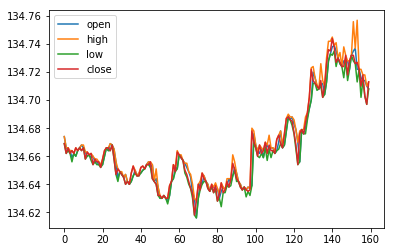

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
Mdata=get_mdata(160,ex_pair)
del Mdata['volume']
Mdata.plot()

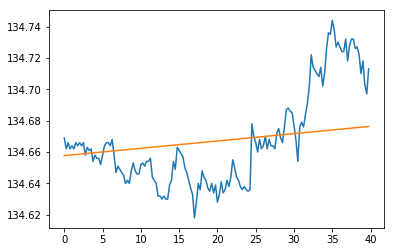

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
N =160 # data number
dt =15 # data step [s]
t = np.arange(0, N*dt, dt) # time
freq = np.linspace(0, 1.0/dt, N) # frequency step
close=get_mdata(N,ex_pair)['close']
fixa=((np.dot(t, close)- close.sum() * t.sum()/N)/((t** 2).sum() - t.sum()**2 / N))
fixb=(close.sum() - fixa * t.sum())/N
plt.plot(t/60,close,t/60,fixa*t+fixb)

In [7]:
np.dot(t, close)

25696734.525

In [6]:
fixb

134.65770017018056

In [4]:
from scipy import integrate
CloseFix=close-fixa*t-fixb
T0=N*dt
a0=1/T0*integrate.simps(CloseFix,t)
def a(k):return 2/T0*integrate.simps(CloseFix*np.cos(2*np.pi*k*t/T0),t)
def b(k):return 2/T0*integrate.simps(CloseFix*np.sin(2*np.pi*k*t/T0),t)
def A(k):return np.sqrt(a(k)**2+b(k)**2)
def Theta(k):return np.arctan2(a(k),b(k))
def AkSin(k):return A(k)*np.sin(2*np.pi*k*t/T0+Theta(k))

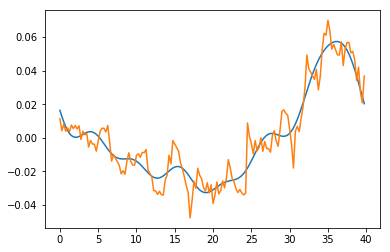

In [9]:
plt.plot(t/60,a0+AkSin(1)+AkSin(2)+AkSin(3)+AkSin(4)+AkSin(5)+AkSin(6)+AkSin(7),t/60,CloseFix)

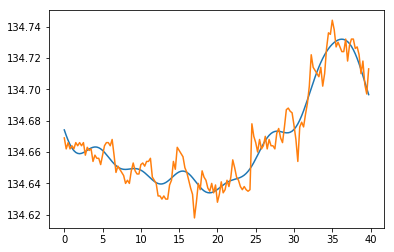

In [10]:
plt.plot(t/60,fixa*t+fixb+a0+AkSin(1)+AkSin(2)+AkSin(3)+AkSin(4)+AkSin(5)+AkSin(6)+AkSin(7),t/60,close)

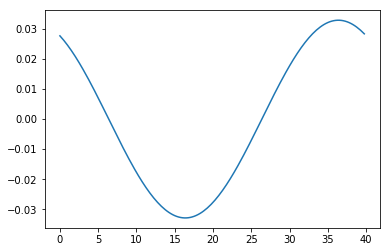

In [11]:
plt.plot(t/60,AkSin(1))

In [12]:
Aarray=np.array([A(i+1) for i in range(10)])
Aarray

array([0.03286468, 0.01214144, 0.00594588, 0.00750354, 0.00209725,
       0.00075055, 0.00348773, 0.00215342, 0.00414434, 0.0034213 ])

In [16]:
(Aarray*2).tolist()

[0.06572936941837293,
 0.02428287259934015,
 0.011891767780668768,
 0.015007070667519738,
 0.004194496515602561,
 0.001501104731612953,
 0.006975459606151494,
 0.0043068390047042,
 0.008288688935843582,
 0.006842601531993959]

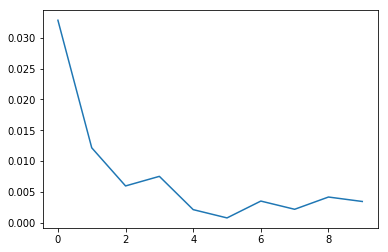

In [17]:
plt.plot(Aarray)

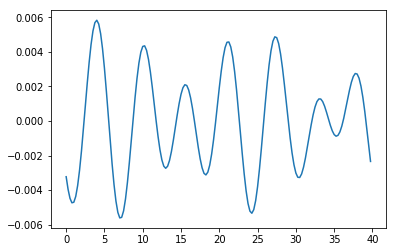

In [18]:
plt.plot(t/60,AkSin(5)+AkSin(6)+AkSin(7))

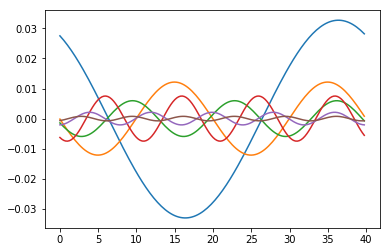

In [15]:
plt.plot(t/60,a0+AkSin(1),t/60,AkSin(2),t/60,AkSin(3),t/60,AkSin(4),t/60,AkSin(5),t/60,AkSin(6))